In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 11_1

In [4]:
A = np.arange(6) + np.arange(0, 51, 10)[:, np.newaxis]

In [5]:
A

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [6]:
arr2 = np.diag([2., 3., 4, 5, 6], -1)

In [7]:
B = arr2[:,:-1]

In [8]:
B

array([[0., 0., 0., 0., 0.],
       [2., 0., 0., 0., 0.],
       [0., 3., 0., 0., 0.],
       [0., 0., 4., 0., 0.],
       [0., 0., 0., 5., 0.],
       [0., 0., 0., 0., 6.]])

# 11_2

In [9]:
X = np.linspace(-(2*np.pi), (2*np.pi), 256)

In [10]:
S = np.sin(X)

In [12]:
C = np.cos(X)

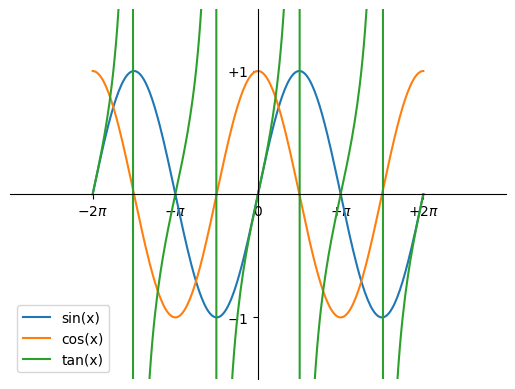

In [13]:
plt.plot(X,S)
plt.plot(X,C)
plt.plot(X,S/C)
ax = plt.gca() 
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.xlim(X.min() * 1.5, X.max() * 1.5)
plt.xticks([-(2*np.pi), -np.pi, 0, np.pi, (2*np.pi)],
          [r'$-2\pi$', r'$-\pi$', r'$0$', r'$+\pi$', r'$+2\pi$'])
plt.ylim(C.min() * 1.5, C.max() * 1.5)
plt.yticks([-1, +1],
          [r'$-1$', r'$+1$'])
plt.legend(['sin(x)', 'cos(x)', 'tan(x)'])

# 11_3

In [2]:
x = np.linspace(-10,10,num = 100)

In [5]:
x = y

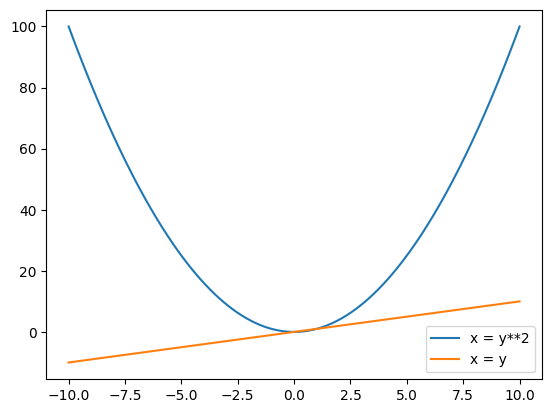

In [6]:
plt.plot(x, y**2)
plt.plot(x, y)
plt.legend(['x = y**2', 'x = y'])

# 11_4

In [31]:
rng = pd.date_range("09/02/2010", periods=1000)

In [32]:
ts = pd.Series(np.random.randint(0,1000,len(rng)),
    index=rng
)

In [33]:
ts = ts.cumsum()

In [34]:
ts

2010-09-02       762
2010-09-03      1472
2010-09-04      2132
2010-09-05      2292
2010-09-06      2892
               ...  
2013-05-24    509231
2013-05-25    509926
2013-05-26    510169
2013-05-27    510376
2013-05-28    510759
Freq: D, Length: 1000, dtype: int32

In [35]:
import matplotlib.pyplot as plt

In [36]:
plt.close("all")

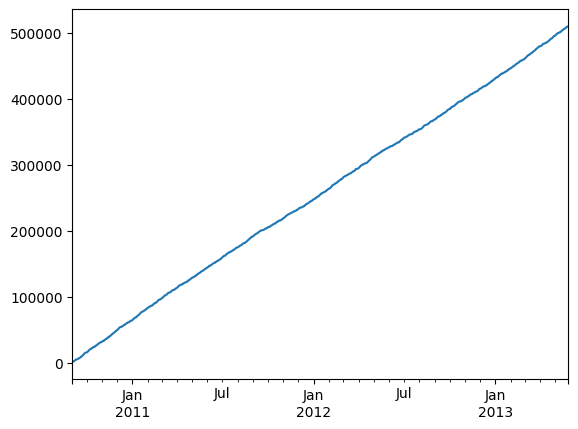

In [37]:
ts.plot();

# 11_5

In [47]:
raw_data = pd.read_csv('dientich.csv',
                       header=1,
                       sep=';',
                       encoding='utf8'
)

In [48]:
raw_data

,,2011,2012,2013,2014,2015
0,,Diện tích(*) (Km2),Diện tích(*) (Km2),Diện tích(*) (Km2),Diện tích(*) (Km2),Diện tích(*) (Km2)
1,Đồng bằng sông Hồng,21068.1,21050.9,21059.3,21060.0,21060.0
2,Hà Nội,3328.9,3323.6,3324.3,3324.5,3324.5
3,Vĩnh Phúc,1236.5,1236.5,1238.6,1237.5,1237.5
4,Bắc Ninh,822.7,822.7,822.7,822.7,822.7
...,...,...,...,...,...,...
68,Bạc Liêu,2468.7,2468.7,2468.7,2468.7,2468.7
69,Cà Mau,5294.9,5294.9,5294.9,5294.9,5294.9
70,(*)Diện tích có đến 01/01/2014 theo Quyết định...,NaN,NaN,NaN,NaN,NaN
71,ngày 21 tháng 7 năm 2014 của Bộ trưởng Bộ Tài...,NaN,NaN,NaN,NaN,NaN


In [49]:
def check_str(input_data):
    return type(input_data) == str
def check_numeric(input_data):
    lst = [i.isdigit() for i in input_data]
    return len(input_data) - sum(lst) < 2

In [50]:
data_remove_Nan = raw_data[raw_data['2015'].apply(check_str)]
data_remove_str = data_remove_Nan[data_remove_Nan['2015'].apply(
    check_numeric)]

In [54]:
data2015 = data_remove_str.iloc[:, lambda df: [0,-1]]

In [57]:
data2015

,,2015
1,Đồng bằng sông Hồng,21060.0
2,Hà Nội,3324.5
3,Vĩnh Phúc,1237.5
4,Bắc Ninh,822.7
5,Quảng Ninh,6102.3
...,...,...
65,Cần Thơ,1408.9
66,Hậu Giang,1602.4
67,Sóc Trăng,3311.6
68,Bạc Liêu,2468.7


In [60]:
data2015_sort = data2015.sort_values('2015',ascending=False)

In [62]:
data2015_top10 = data2015_sort.iloc[0:9]

In [63]:
data2015_top10

,,2015
28,Bắc Trung Bộ và Duyên hải miền Trung,95832.4
13,Trung du và miền núi phía Bắc,95266.8
43,Tây Nguyên,54641.0
56,Đồng bằng sông Cửu Long,40576.0
49,Đông Nam Bộ,23590.7
1,Đồng bằng sông Hồng,21060.0
30,Nghệ An,16490.0
45,Gia Lai,15536.9
26,Sơn La,14174.4


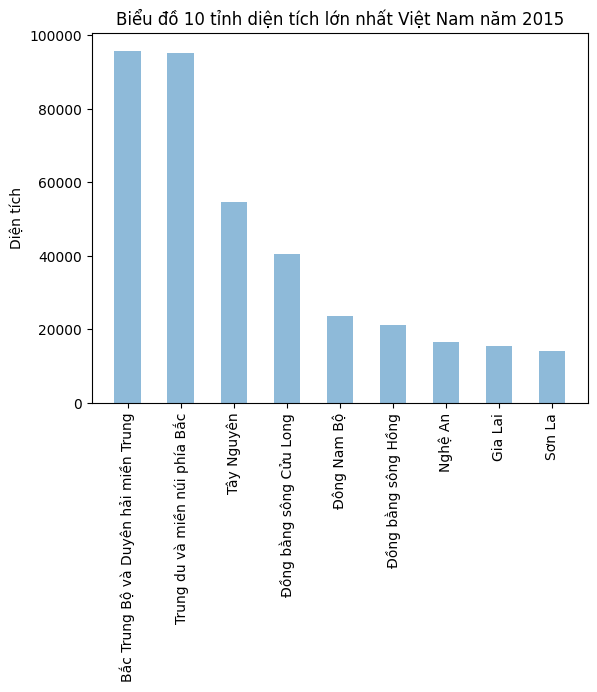

In [64]:
data2015_top10.columns = ['name', 'y_2015']

y_pos = np.arange(len(data2015_top10.index))
plt.bar(y_pos, data2015_top10.y_2015, align='center', alpha=0.5, width=0.5)
plt.xticks(y_pos, data2015_top10.name)
plt.ylabel('Diện tích')
plt.title('Biểu đồ 10 tỉnh diện tích lớn nhất Việt Nam năm 2015')
plt.xticks(rotation=90)
plt.show()

# 11_6

In [118]:
databitcoin = pd.read_csv('localbtcVND.csv')

In [119]:
databitcoin.columns=['Timestamp','Price1','Price2']

In [121]:
import statistics

In [132]:
A = databitcoin.describe()

In [134]:
A.convert_dtypes()

,Timestamp,Price1,Price2
count,818.0,818.0,818.0
mean,1473026543.231051,18836860.287934,1.047564
std,17651741.914368,10909724.951082,2.038766
min,1395747805.0,1193925.47,0.0006
25%,1463465776.75,10924172.1775,0.110309
50%,1475682753.0,15631054.96,0.2868
75%,1486179517.0,23739046.6875,1.015575
max,1496120420.0,76454277.83,19.3297
